In [198]:
import torch
import torch.nn as nn
import random
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

SAMPLES = 1000
LEARNING_RATE = 0.01
EPOCHS = 1000

In [199]:
def generate_Data():
    data_x=[]
    data_y=[]
    for i in range(SAMPLES):
        data_x.append([random.uniform(-2,2), random.uniform(-2,2)])
        data_y.append([math.sin(data_x[i][0]*data_x[i][1]), math.cos(data_x[i][0] + data_x[i][1]), (data_x[i][0] + data_x[i][1])**2])
        
    return data_x, data_y

In [200]:
data_x, data_y = generate_Data()

In [201]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, train_size = 0.7, test_size = 0.3)

In [202]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [203]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 70),
            nn.Tanh(),
            nn.Linear(70,70),
            nn.Tanh(),
            nn.Linear(70,3),
        )
        
    def forward(self, x):
        x =  self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [204]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=70, bias=True)
    (1): Tanh()
    (2): Linear(in_features=70, out_features=70, bias=True)
    (3): Tanh()
    (4): Linear(in_features=70, out_features=3, bias=True)
  )
)


In [205]:
X = torch.FloatTensor(X_train)
Y = torch.FloatTensor(y_train)

X_test = torch.FloatTensor(X_test)
Y_test = torch.FloatTensor(y_test)
X.shape

torch.Size([700, 2])

In [225]:
def train_loop(model, loss_fn, optimizer):
    model.train()
    pred = model(X)
    loss = loss_fn(pred, Y)

    #Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
def test_loop(model, loss_fn, X_test, Y_test):
    model.eval()
    test_loss, correct = 0,0
    
    with torch.no_grad():
        pred = model(X_test)
        test_loss += loss_fn(pred, Y_test).item()
        #correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= SAMPLES
    correct /= len(X_test)
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")
    
    return test_loss

In [226]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

test_losses = []
for t in range(EPOCHS):
    print(f"Epoch {t+1}-------------------")
    train_loop(model, loss_fn, optimizer)
    test_losses.append(test_loop(model,loss_fn, X_test, Y_test))
print("Done")

Epoch 1-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 2-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 3-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 4-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 5-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 6-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 7-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 8-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 9-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 10-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 11-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 12-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 13-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 14-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 15-------------------
Test Error: 
 Avg loss: 0.000058 

Epoch 16-------------------
Test Error: 
 Avg loss: 0.000058 

E

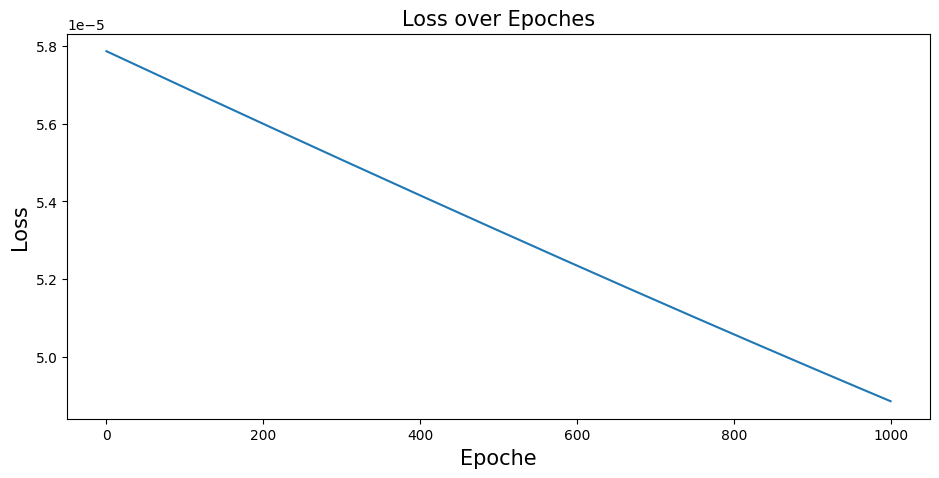

In [227]:
fig, ax = plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=20, right=0.7)
ax.plot(range(EPOCHS), test_losses)

ax.set_xlabel('Epoche', fontdict={'size':15})
ax.set_ylabel('Loss', fontdict={'size':15})
ax.set_title('Loss over Epoches', fontdict={'size':15})

plt.show()

In [228]:
data_new_x, data_new_y = generate_Data()
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_new_x, data_new_y, train_size = 0.7, test_size = 0.3)

X_new = torch.FloatTensor(X_train_new)
Y_new = torch.FloatTensor(y_train_new)

X_test_new = torch.FloatTensor(X_test_new)
Y_test_new = torch.FloatTensor(y_test_new)

In [229]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

new_losses = []
for t in range(EPOCHS):
    print(f"Epoch {t+1}-------------------")
    train_loop(model, loss_fn, optimizer)
    new_losses.append(test_loop(model,loss_fn, X_test_new, Y_test_new))
print("Done")

Epoch 1-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 2-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 3-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 4-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 5-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 6-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 7-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 8-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 9-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 10-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 11-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 12-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 13-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 14-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 15-------------------
Test Error: 
 Avg loss: 0.000043 

Epoch 16-------------------
Test Error: 
 Avg loss: 0.000043 

E

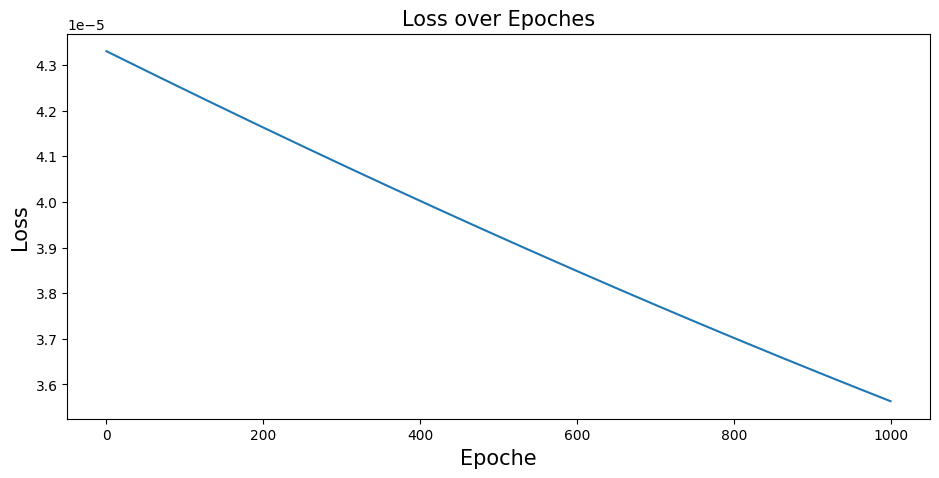

In [230]:
fig, ax = plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=20, right=0.7)
ax.plot(range(EPOCHS), new_losses)

ax.set_xlabel('Epoche', fontdict={'size':15})
ax.set_ylabel('Loss', fontdict={'size':15})
ax.set_title('Loss over Epoches', fontdict={'size':15})

plt.show()